In [1]:
import tensorflow as tf
import os
import numpy as np
import time
import matplotlib.pyplot as plt 

In [3]:
np.zeros((10,10),dtype=np.int32)

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [2]:
from prep import mnist_funct, fashion_funct, merger
mnist = mnist_funct()
fashion = fashion_funct()
merged = merger()

19 10
19 10
19 10
19 10


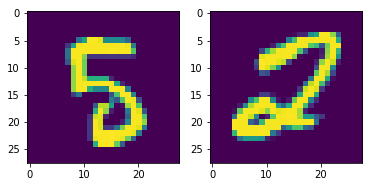

merged label : 5
 label : 2


In [24]:
i = np.random.randint(60000)
f = plt.figure()
f.add_subplot(1,2, 1)
plt.imshow(merged['train_x'][i,:,:,:].reshape(28,28))
f.add_subplot(1,2, 2)
plt.imshow(mnist['train_x'][i,:,:,:].reshape(28,28))
plt.show(block=True)
print("merged label : {}".format(merged['train_y'][i]))
print(" label : {}".format(mnist['train_y'][i]))

In [12]:
n = 1000
merged['train_y'][:n]

array([ 0,  4,  4,  4, 10,  0, 12, 18,  2, 15,  7, 17, 13, 19,  1, 18, 17,
        2,  0,  0,  5, 14, 11, 17,  1,  2,  5,  2,  1,  4, 13,  0,  8,  3,
        1, 12,  2, 12,  0, 18,  8, 12,  8, 18, 15, 19,  1, 15, 18,  4,  4,
       13,  7, 11, 14,  3, 17, 12, 13,  7,  0, 12, 14,  3, 12, 15,  3, 19,
        4,  3, 15, 15, 17,  5, 15,  5,  6,  6, 16,  6, 18,  5,  7,  7, 16,
       14, 11, 17,  4, 10,  0,  3,  5, 16, 11,  4,  5, 16,  7, 16, 17, 13,
       12,  7, 19, 12, 12, 17,  8,  8,  9,  7, 17,  8,  4,  2,  1,  3,  7,
        7,  3,  5,  3,  3,  6, 14, 15,  7, 11, 16, 16,  2,  7,  5, 17, 10,
       15, 13,  3, 17,  3, 15,  7,  7,  1,  2,  1,  0, 17,  1,  6,  8, 12,
       11,  0,  5,  3,  9, 19,  6,  8,  1, 17, 12, 11,  1, 19, 13,  0, 15,
       17, 14,  6, 16, 16,  3,  7, 10,  9,  3,  2,  0,  1,  1, 17,  8,  2,
       17, 10,  4,  2, 11, 14,  6, 11,  0,  8, 12,  6,  7,  9, 19, 19,  9,
        1, 18, 19,  6, 18, 18, 15,  6,  7, 18,  6,  5,  5,  5, 12,  0, 10,
       11,  2,  1, 18, 19

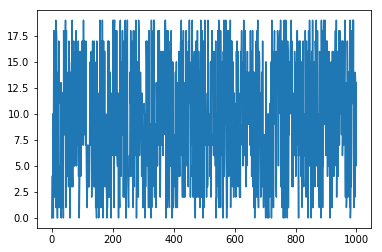

In [13]:
plt.plot(np.arange(n),merged['train_y'][:n])